In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(X_train, y_train),(X_test, y_test)= tf.keras.datasets.boston_housing.load_data(
    path='boston_housing_npz',
    test_split= 0.2,
    seed= 42
)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (y_train.shape, type(y_train)), (y_test.shape, type(y_test))

(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [ ]:
X_train_df= pd.DataFrame(X_train)
y_train_df= pd.DataFrame(y_train)
X_train_df.head(10)
# y_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [ ]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [ ]:
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
ct= make_column_transformer(
    (MinMaxScaler(), [0,1,2,3,4,5,6,7,8,9,10,11,12])
)
X_train= ct.fit_transform(X_train).astype('float32')
X_test= ct.fit_transform(X_test).astype('float32')
y_train= y_train.astype('float32')
y_test= y_test.astype('float32')

pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.069307,0.348815,0.521905,0.681970,0.241618,0.376560,0.423589,0.625737,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.254290,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.000000,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.000000,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.000000,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size= 0.1, random_state= 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((363, 13), (41, 13), (363,), (41,))

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],), name='Input'),
    tf.keras.layers.Dense(10, activation='relu', name='Dense_1'),
    tf.keras.layers.Dense(100, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(1, name='Prediction')
])
model.compile(
    loss= 'mean_squared_error',
    optimizer= tf.keras.optimizers.RMSprop(learning_rate= 0.01),
    metrics=['mse']
)
history= model.fit(
    X_train,
    y_train,
    batch_size= 32,
    epochs= 100,
    validation_data=(X_val, y_val)
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 409.9163 - mse: 409.9163 - val_loss: 113.7875 - val_mse: 113.7875
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 73.6464 - mse: 73.6464 - val_loss: 66.8159 - val_mse: 66.8159
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 46.6668 - mse: 46.6668 - val_loss: 54.5469 - val_mse: 54.5469
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 40.6862 - mse: 40.6862 - val_loss: 47.8517 - val_mse: 47.8517
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.9543 - mse: 36.9543 - val_loss: 42.2291 - val_mse: 42.2291
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33.8170 - mse: 33.8170 - val_loss: 37.5305 - val_mse: 37.5305
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 31.0736 - mse: 31.0736 - val_loss: 33.8348 - val_mse: 33.8348
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.9967 - mse: 28.9967 - val_loss: 30.9868 - val_mse: 30.9868
Epoch 9/100
12/12 ━━

In [ ]:
y_train.mean(), y_val.mean()

(np.float32(22.235537), np.float32(24.89756))

In [ ]:
print("Evaluation on test data \n")
loss, mse= model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mse):.2f}")

Evaluation on test data 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.7537 - mse: 21.7537 

Model loss on test set: 22.82498550415039
Model mean squared error on test set: 22.82


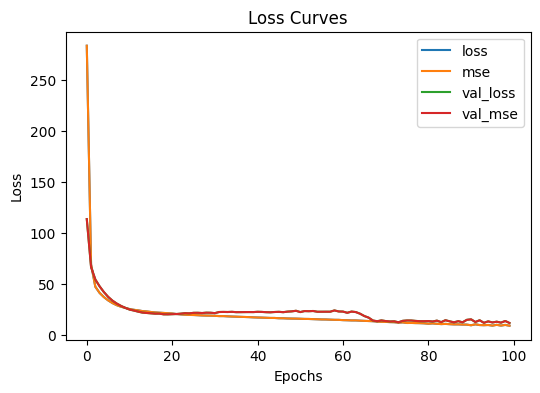

In [ ]:
pd.DataFrame(history.history).plot(figsize=(6,4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

In [ ]:
y_pred= model.predict(X_test)
y_pred[0]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([19.214457], dtype=float32)

In [ ]:
y_pred

array([[19.214457 ],
       [24.03705  ],
       [13.753655 ],
       [27.08256  ],
       [17.030788 ],
       [14.466325 ],
       [29.717993 ],
       [18.952114 ],
       [19.825203 ],
       [18.618877 ],
       [40.79428  ],
       [21.040007 ],
       [23.165472 ],
       [ 8.692115 ],
       [26.657207 ],
       [18.989645 ],
       [32.203445 ],
       [17.528708 ],
       [19.43022  ],
       [10.66313  ],
       [21.203266 ],
       [10.929505 ],
       [ 8.092987 ],
       [16.687778 ],
       [10.888875 ],
       [24.86134  ],
       [18.753426 ],
       [12.326993 ],
       [12.435165 ],
       [33.55498  ],
       [ 7.2602253],
       [17.776438 ],
       [21.524622 ],
       [18.952124 ],
       [11.15229  ],
       [24.406773 ],
       [17.767853 ],
       [34.09169  ],
       [18.044716 ],
       [18.041603 ],
       [17.625753 ],
       [26.546715 ],
       [ 7.2602253],
       [28.68054  ],
       [40.612312 ],
       [17.879583 ],
       [17.519114 ],
       [11.61


# 🧠 Boston Housing Price Prediction using TensorFlow

## 1. 📌 General Overview

This project builds a **regression model** using **TensorFlow/Keras** to predict median house prices from the **Boston Housing dataset**.

### 🔧 Key Steps:
1. Load and preprocess the dataset.
2. Scale features using `MinMaxScaler`.
3. Split data into training, validation, and test sets.
4. Build a neural network using `Sequential` API.
5. Train the model with the RMSprop optimizer.
6. Evaluate performance on test data.
7. Visualize training/validation loss.
8. Make predictions.

---

## 2. 🧰 Key Technologies & Concepts

### 🧪 TensorFlow / Keras
- **What**: Open-source ML library by Google; Keras is a high-level API within TensorFlow.
- **Why**: Easy model building, GPU support, well-documented.
- **Example Use Cases**:
  - Image Classification (CNN)
  - NLP (Sentiment Analysis)
  - Time Series Forecasting

---

### 📊 Boston Housing Dataset
- **What**: Dataset with 13 numerical features and target = median home price.
- **Why**: Small, clean, great for regression examples.
- **Features**:
  - `CRIM`: Per capita crime rate
  - `RM`: Avg rooms per dwelling
  - `LSTAT`: % of lower status population

---

### 📏 MinMaxScaler (`sklearn.preprocessing`)
- **What**: Scales features to a given range, usually [0, 1].
- **Why**: Neural networks perform better when inputs are normalized.
- **Formula**:
  ```
  X_scaled = (X - X_min) / (X_max - X_min)
  ```

---

### ✂️ train_test_split (`sklearn.model_selection`)
- **What**: Splits dataset into training and testing subsets.
- **Why**: Helps evaluate model performance on unseen data.
- **Usage**:
  ```python
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  ```

---

### 🏗️ Sequential API (Keras)
- **What**: A simple stack of layers (input → hidden → output).
- **Why**: Great for quick prototyping.
- **Example**:
  ```python
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
  ```

---

### ⚙️ RMSprop Optimizer
- **What**: Adapts learning rate based on recent gradients.
- **Why**: Prevents oscillation and helps converge faster.
- **Use Case**: Time series, speech, noisy gradients

---

### 📈 Metrics: Mean Squared Error (MSE)
- **Formula**:
  \[
  MSE =
rac{1}{n} \sum (y_{	ext{true}} - y_{	ext{pred}})^2
  \]
- **Why**: Penalizes larger errors more; good for regression tasks.

---

### 📉 Training History
- **Object**: `history.history` (returned after `.fit()`)
- **Use**: Plot loss curves, detect overfitting/underfitting.
- **Example**:
  ```python
  pd.DataFrame(history.history).plot()
  ```

---

### 🧪 Evaluation & Prediction
- `model.evaluate()`: Gives loss and metrics on test data.
- `model.predict()`: Predicts outputs for new inputs.

---

✅ End-to-end, this workflow lets you **build, train, evaluate, and use a regression model** for predicting Boston housing prices using deep learning.
